In [323]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score\
    ,fbeta_score,classification_report,confusion_matrix,precision_recall_curve,roc_auc_score\
    ,roc_curve

In [324]:
df_full = pd.read_csv('test_dataset.csv')

Let's clean our data from NaN. (username and password have NaN values). The most realistic thing is removing them from dataset. There is 
no clever way to find "average" username or password.

In [325]:
df_full.dropna(subset=['username', 'password'], inplace=True)

In [326]:
fake=df_full[df_full['is_fake']==1]

In [327]:
fake.size

531867

In [328]:
fake.head()

,username,password,publisher,register_datetime,domain,partner,is_fake
35,cnds10,cnds251088,pub_31526,2017-01-01 23:01:12,d_42_com,par_58,1
44,untfdm,5v5if62,pub_40507,2017-01-01 23:13:13,d_65_com,par_82,1
45,12440351,3030663,pub_97388,2017-01-01 23:13:41,d_56_com,par_74,1
46,4839198,5903,pub_7243,2017-01-01 23:14:16,d_63_com,par_89,1
48,fscfs,7263120,pub_96549,2017-01-01 23:14:54,d_56_com,par_74,1


In [329]:
not_fake=df_full[df_full['is_fake']==0]

In [330]:
def visualize(df, column_name='register_datetime', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name].dt.hour)
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("hour of the day")
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.show()

def visualize_weekday(df, column_name='register_datetime', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name].dt.weekday)
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("day of week")
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.show()
    
def visualize_month(df, column_name='register_datetime', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name].dt.month)
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("day of week")
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.show()
    
def visualize_day(df, column_name='register_datetime', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name].dt.day)
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("day of week")
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.show()
    
def visualize_on_text_field(df, column_name='publisher', color='#494949', title=''):
    """
    Visualize a dataframe with a date column.

    Parameters
    ----------
    df : Pandas dataframe
    column_name : str
        Column to visualize
    color : str
    title : str
    """
    plt.figure(figsize=(20, 10))
    ax = (df[column_name].groupby(df[column_name])
                         .count()).plot(kind="bar", color=color)
    ax.set_facecolor('#eeeeee')
    ax.set_xlabel("day of week")
    ax.set_ylabel("count")
    ax.set_title(title)
    plt.show()

In [331]:
fake['register_datetime']=pd.to_datetime(fake['register_datetime'], errors='coerce')
not_fake['register_datetime']=pd.to_datetime(not_fake['register_datetime'], errors='coerce')

/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [332]:
fake.dtypes

username                     object
password                     object
publisher                    object
register_datetime    datetime64[ns]
domain                       object
partner                      object
is_fake                       int64
dtype: object

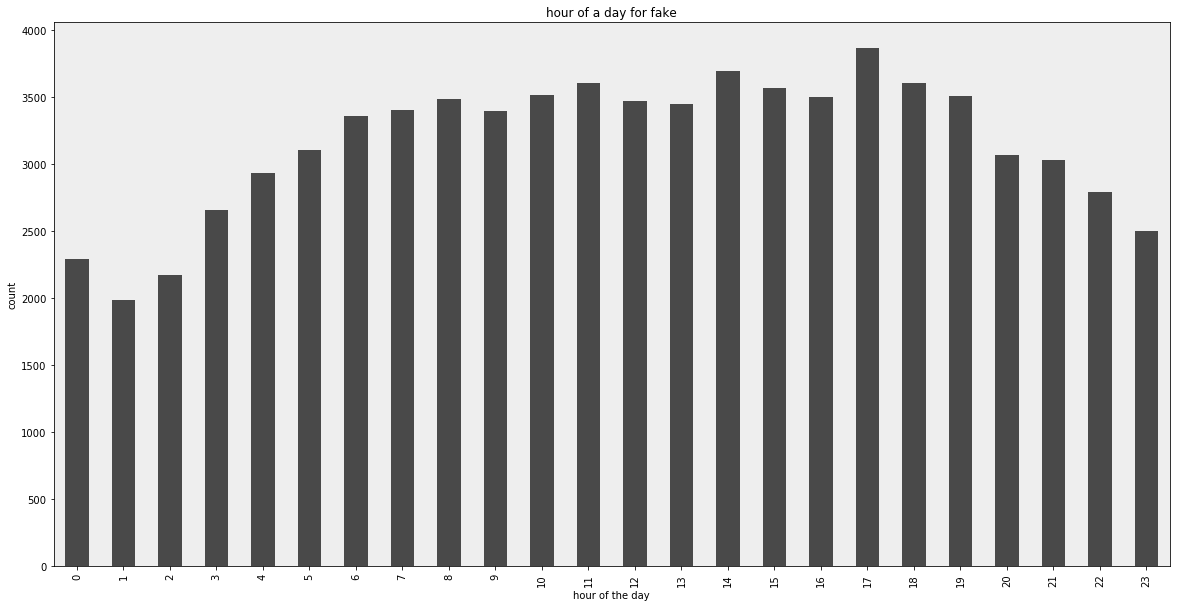

In [333]:
visualize(fake, title='hour of a day for fake')

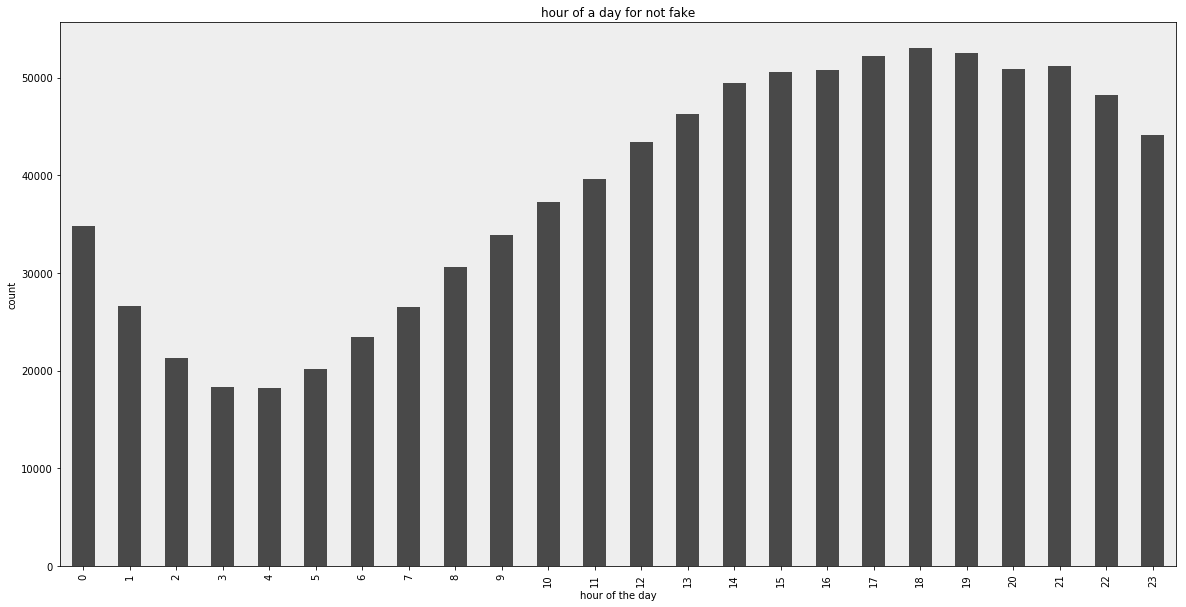

In [334]:
visualize(not_fake, title='hour of a day for not fake')

As we can see, normal people don't like to register in interval from 2am to 6am.

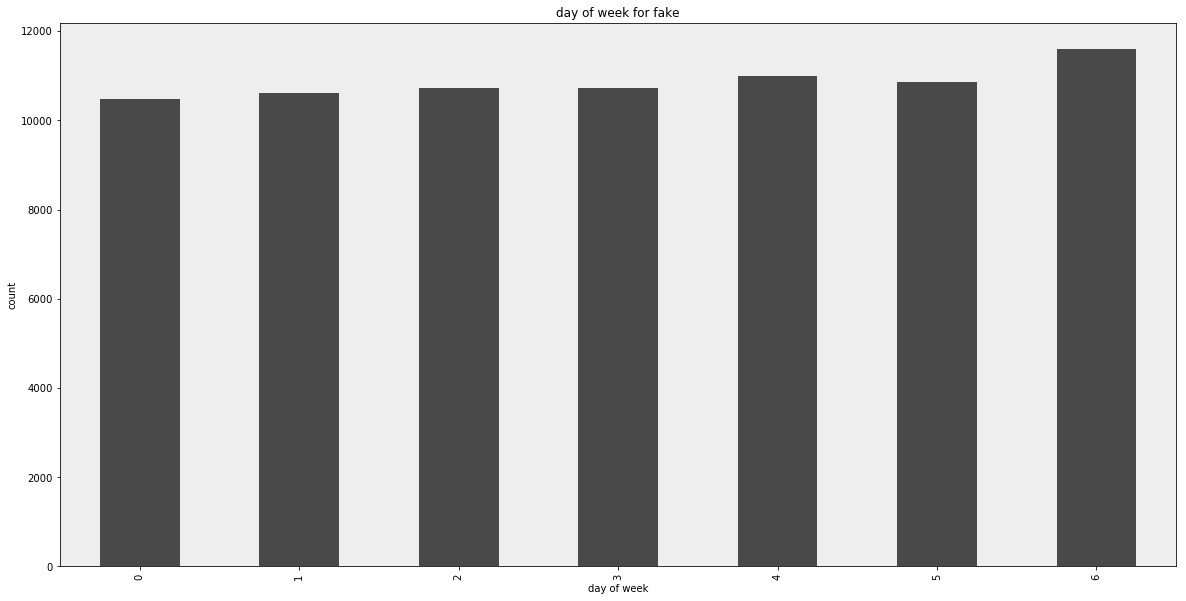

In [335]:
visualize_weekday(fake, title='day of week for fake')

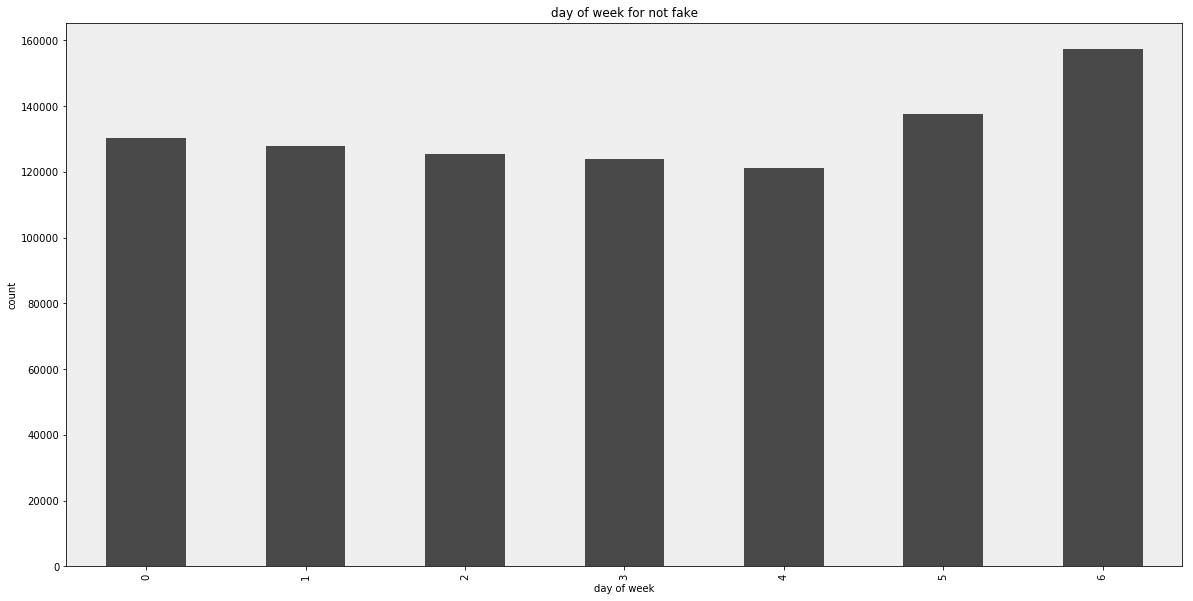

In [336]:
visualize_weekday(not_fake, title='day of week for not fake')

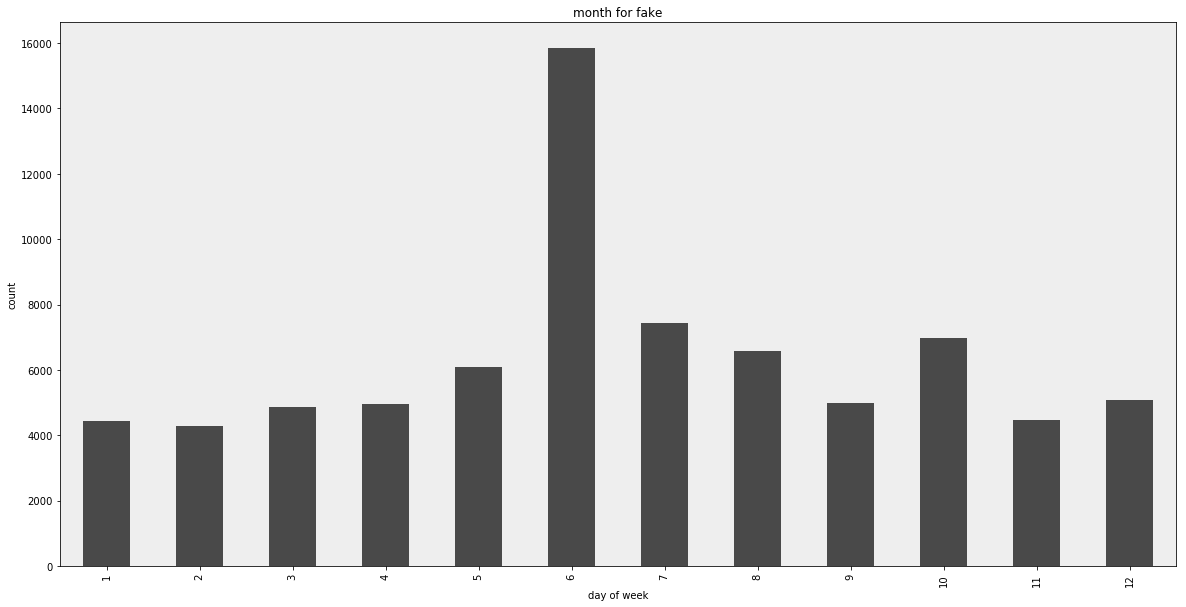

In [337]:
visualize_month(fake, title='month for fake')

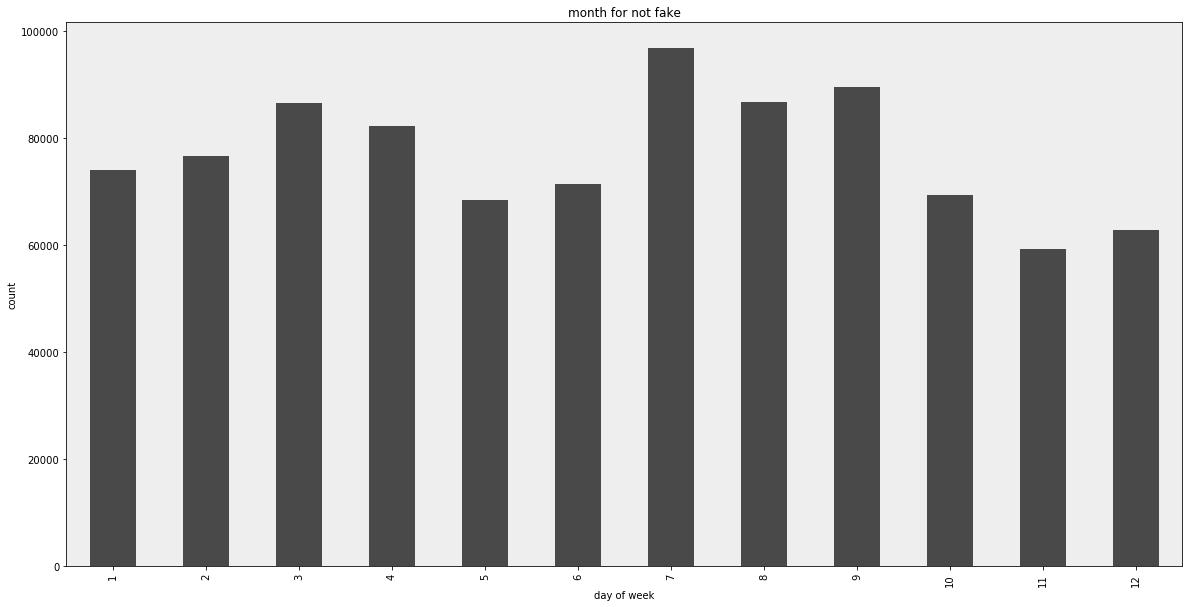

In [338]:
visualize_month(not_fake, title='month for not fake')

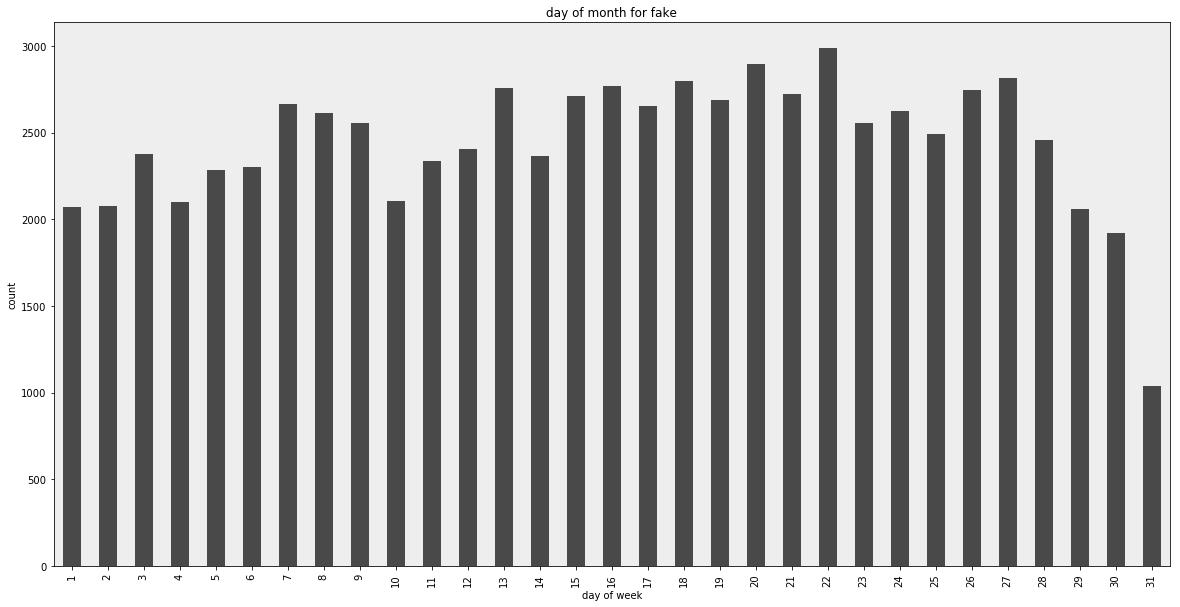

In [339]:
visualize_day(fake, title='day of month for fake')

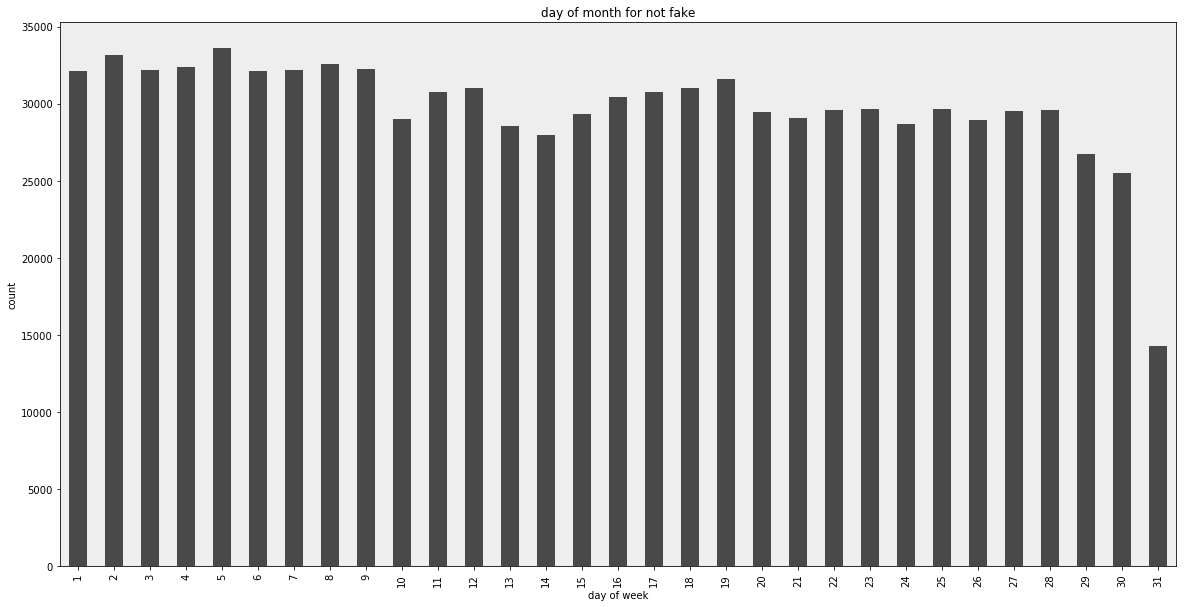

In [340]:
visualize_day(not_fake, title='day of month for not fake')

So, it is obvious that data in day of month in both cases distributed nearly the same. As well as in day of week. Interesting thing
is that month distribution is strange. Month #6 definitely works in different for fake and not fake groups. <br/> So, we need to include following data characteristics through OHE:<br/>
1) hour is between 2 a.m. and 6 a.m.<br/>
2) month #6


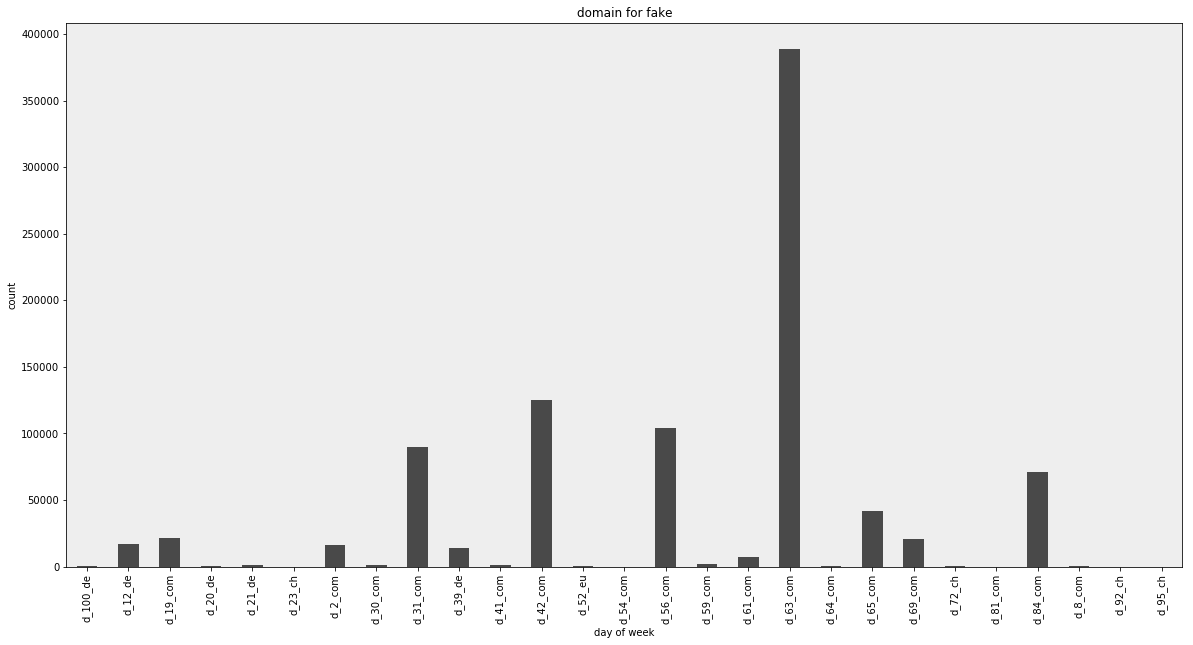

In [341]:
visualize_on_text_field(not_fake, column_name='domain', title='domain for fake')

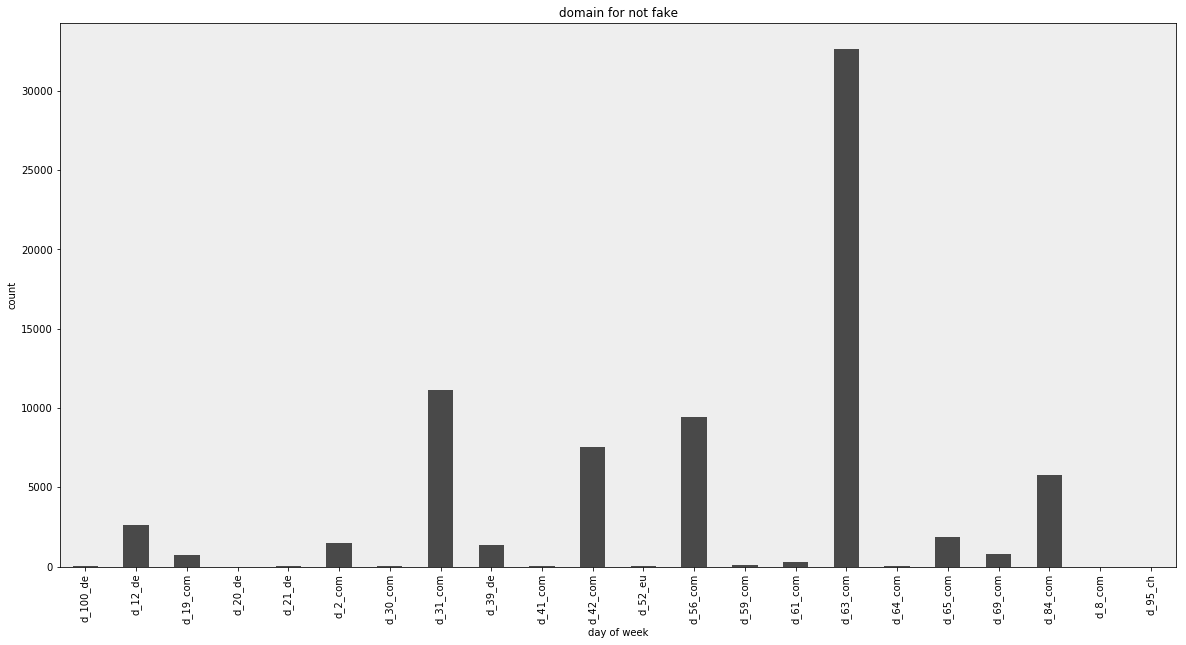

In [342]:
visualize_on_text_field(fake, column_name='domain', title='domain for not fake')

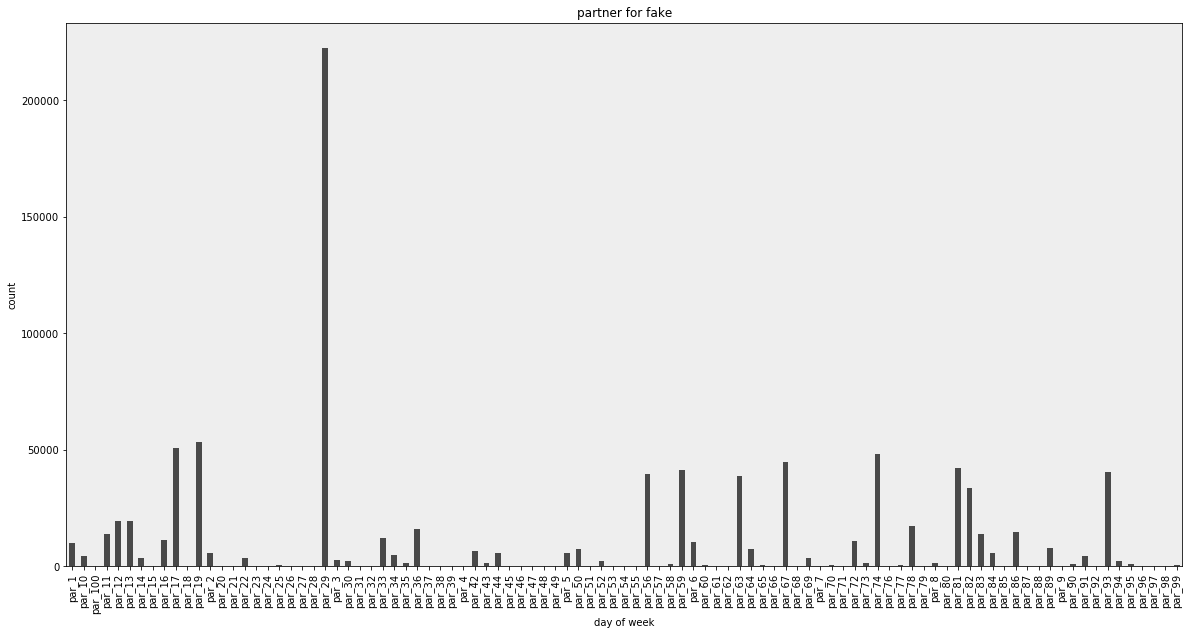

In [343]:
visualize_on_text_field(not_fake, column_name='partner', title='partner for fake')

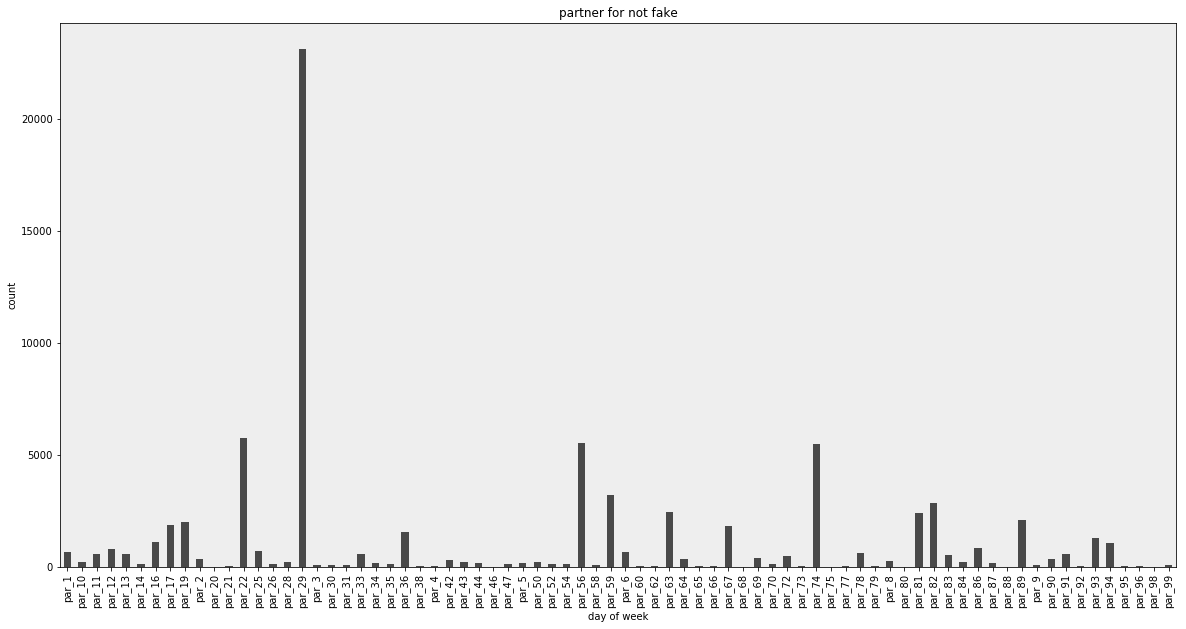

In [344]:
visualize_on_text_field(fake, column_name='partner', title='partner for not fake')

Domain and partner as wee can see don't' provide really valuable information about fake/not_fake. 

In [345]:
fake['vowels_user'] = fake.username.str.lower().str.count(r'[aeiou]')
fake['consonant_user'] = fake.username.str.lower().str.count(r'[a-z]') - fake['vowels_user']
not_fake['vowels_user'] = not_fake.username.str.lower().str.count(r'[aeiou]')
not_fake['consonant_user'] = not_fake.username.str.lower().str.count(r'[a-z]') - not_fake['vowels_user']

fake['vowels_pass'] = fake.password.str.lower().str.count(r'[aeiou]')
fake['consonant_pass'] = fake.password.str.lower().str.count(r'[a-z]') - fake['vowels_pass']
not_fake['vowels_pass'] = not_fake.password.str.lower().str.count(r'[aeiou]')
not_fake['consonant_pass'] = not_fake.password.str.lower().str.count(r'[a-z]') - not_fake['vowels_pass']

/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [346]:
fake[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']] = fake[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']].astype(float)
not_fake[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']] = not_fake[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']].astype(float)

fake.head(100)

,username,password,publisher,register_datetime,domain,partner,is_fake,vowels_user,consonant_user,vowels_pass,consonant_pass
35,cnds10,cnds251088,pub_31526,2017-01-01 23:01:12,d_42_com,par_58,1,0.0,4.0,0.0,4.0
44,untfdm,5v5if62,pub_40507,2017-01-01 23:13:13,d_65_com,par_82,1,1.0,5.0,1.0,2.0
45,12440351,3030663,pub_97388,2017-01-01 23:13:41,d_56_com,par_74,1,0.0,0.0,0.0,0.0
46,4839198,5903,pub_7243,2017-01-01 23:14:16,d_63_com,par_89,1,0.0,0.0,0.0,0.0
48,fscfs,7263120,pub_96549,2017-01-01 23:14:54,d_56_com,par_74,1,0.0,5.0,0.0,0.0
91,pippppp,12346,pub_25270,2017-01-01 23:57:25,d_56_com,par_74,1,1.0,6.0,0.0,0.0
117,tdc3ryahks,vkenqtyc5h,pub_52181,2017-01-01 00:19:31,d_63_com,par_29,1,1.0,8.0,1.0,8.0
173,blasch1,ez4rhmcf,pub_32016,2017-01-01 00:58:49,d_63_com,par_69,1,1.0,5.0,1.0,6.0
184,yrm0527,111111,pub_95767,2017-01-01 01:06:48,d_63_com,par_19,1,0.0,3.0,0.0,0.0
189,why911,91111111,pub_59814,2017-01-01 01:10:01,d_65_com,par_74,1,0.0,3.0,0.0,0.0


In [347]:
not_fake.head(100)

,username,password,publisher,register_datetime,domain,partner,is_fake,vowels_user,consonant_user,vowels_pass,consonant_pass
0,glenister,38cli9z,pub_97409,2017-01-01 22:01:35,d_42_com,par_17,0,3.0,6.0,1.0,3.0
1,kim12349,password,pub_22326,2017-01-01 22:07:26,d_42_com,par_58,0,1.0,2.0,2.0,6.0
2,bxalcbmah,l84o1aa,pub_85995,2017-01-01 22:09:22,d_63_com,par_29,0,2.0,7.0,3.0,1.0
3,chokeme,895263,pub_16333,2017-01-01 22:10:28,d_42_com,par_17,0,3.0,4.0,0.0,0.0
4,umbriel,requete,pub_81878,2017-01-01 22:14:58,d_31_com,par_29,0,3.0,4.0,4.0,3.0
5,shikaturova_maria,1988masha,pub_85995,2017-01-01 22:17:19,d_63_com,par_29,0,8.0,8.0,2.0,3.0
6,radikraisovich,cvb987ws,pub_11912,2017-01-01 22:18:39,d_63_com,par_89,0,6.0,8.0,0.0,5.0
7,sunshines,000555777,pub_34338,2017-01-01 22:21:24,d_42_com,par_17,0,3.0,6.0,0.0,0.0
8,i_vadik,02061974,pub_34338,2017-01-01 22:25:30,d_42_com,par_17,0,3.0,3.0,0.0,0.0
9,v.7.kovalchuk,vetalik,pub_42251,2017-01-01 22:25:44,d_56_com,par_29,0,3.0,7.0,3.0,4.0


It is obvious that ratio of Consonants and Vowels in usernames and passwords are completely different between fake and not_fake groups. 
Let's' see that through plots. We should definitely include that features.Let's' introduce measure of part of vowels into word except numbers and special symbols.

In [348]:
fake['user_vowel_measure'] = fake.apply(lambda row: 0 if row['vowels_user']==0 else row['vowels_user']/(row['vowels_user']+row['consonant_user']), axis=1)
not_fake['user_vowel_measure'] = not_fake.apply(lambda row: 0 if row['vowels_user']==0 else row['vowels_user']/(row['vowels_user']+row['consonant_user']), axis=1)

fake['pass_vowel_measure'] = fake.apply(lambda row: 0 if row['vowels_pass']==0 else row['vowels_pass']/(row['vowels_pass']+row['consonant_pass']), axis=1)
not_fake['pass_vowel_measure'] = not_fake.apply(lambda row: 0 if row['vowels_pass']==0 else row['vowels_pass']/(row['vowels_pass']+row['consonant_pass']), axis=1)

/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ilia/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

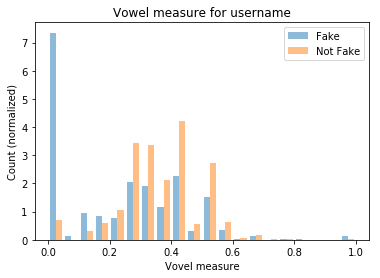

In [349]:
n, bins, patches = plt.hist([fake['user_vowel_measure'], not_fake['user_vowel_measure']], 20, alpha=0.5, normed=True, label=['Fake', 'Not Fake'])
plt.legend(loc='upper right')
plt.title(r'Vowel measure for username')
plt.xlabel('Vovel measure')
plt.ylabel('Count (normalized)')
plt.show()

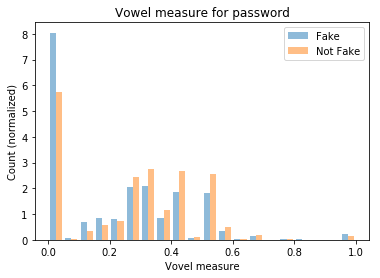

In [350]:
n, bins, patches = plt.hist([fake['pass_vowel_measure'], not_fake['pass_vowel_measure']], 20, alpha=0.5, normed=True, label=['Fake', 'Not Fake'])
plt.legend(loc='upper right')
plt.title(r'Vowel measure for password')
plt.xlabel('Vovel measure')
plt.ylabel('Count (normalized)')
plt.show()

One can see that for username that dependency is more clear than for password. I.e. vowel measure is low for fake usernames 
and higher for not fake.
<br/>
The following features will be included in our learning model:<br/>
    - username vowel<br/>
    - username consonant
    - password vowel
    - password consonant
    - username vowel measure (UVM)
    - password vowel measure (PVM)
    - is morning (2am-6am)?
    - is 6th month?
    - domain (OHE)
    - partner (OHE)
I decided to exclude info about publisher because we have a lot of unique publishers and there is almost no sense to 
include so much info in OHE for publisher. No big profit we will receive. Fake and not fake distributed nearly the same in 
publisher's' domain.

In [351]:
X=df_full

In [352]:
X['vowels_user'] = X.username.str.lower().str.count(r'[aeiou]')
X['consonant_user'] = X.username.str.lower().str.count(r'[a-z]') - X['vowels_user']
X['vowels_pass'] = X.password.str.lower().str.count(r'[aeiou]')
X['consonant_pass'] = X.password.str.lower().str.count(r'[a-z]') - X['vowels_pass']
X[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']] = X[['vowels_user', 'consonant_user', 'vowels_pass', 'consonant_pass']].astype(float)
X['UVM'] = X.apply(lambda row: 0 if row['vowels_user']==0 else row['vowels_user']/(row['vowels_user']+row['consonant_user']), axis=1)
X['PVM'] = X.apply(lambda row: 0 if row['vowels_pass']==0 else row['vowels_pass']/(row['vowels_pass']+row['consonant_pass']), axis=1)


In [353]:
X['register_datetime'] = pd.to_datetime(X['register_datetime'], errors='coerce')

In [354]:
X['is_morning'] = X.apply(lambda row: 1 if (row['register_datetime'].hour>=2) and (row['register_datetime'].hour<=6) else 0, axis=1)
X['is_6_month'] = X.apply(lambda row: 1 if row['register_datetime'].month==6 else 0, axis=1)

In [355]:
X.head()

,username,password,publisher,register_datetime,domain,partner,is_fake,vowels_user,consonant_user,vowels_pass,consonant_pass,UVM,PVM,is_morning,is_6_month
0,glenister,38cli9z,pub_97409,2017-01-01 22:01:35,d_42_com,par_17,0,3.0,6.0,1.0,3.0,0.333333,0.250000,0,0
1,kim12349,password,pub_22326,2017-01-01 22:07:26,d_42_com,par_58,0,1.0,2.0,2.0,6.0,0.333333,0.250000,0,0
2,bxalcbmah,l84o1aa,pub_85995,2017-01-01 22:09:22,d_63_com,par_29,0,2.0,7.0,3.0,1.0,0.222222,0.750000,0,0
3,chokeme,895263,pub_16333,2017-01-01 22:10:28,d_42_com,par_17,0,3.0,4.0,0.0,0.0,0.428571,0.000000,0,0
4,umbriel,requete,pub_81878,2017-01-01 22:14:58,d_31_com,par_29,0,3.0,4.0,4.0,3.0,0.428571,0.571429,0,0


In [356]:
one_hot_domain = pd.get_dummies(X['domain'])
one_hot_partner = pd.get_dummies(X['partner'])
X=X.drop(['domain', 'partner', 'username', 'password', 'publisher', 'register_datetime'], axis=1)

In [357]:
X=X.join(one_hot_domain)
X=X.join(one_hot_partner)

In [358]:
X.head()

,is_fake,vowels_user,consonant_user,vowels_pass,consonant_pass,UVM,PVM,is_morning,is_6_month,d_100_de,...,par_90,par_91,par_92,par_93,par_94,par_95,par_96,par_97,par_98,par_99
0,0,3.0,6.0,1.0,3.0,0.333333,0.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1.0,2.0,2.0,6.0,0.333333,0.250000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,7.0,3.0,1.0,0.222222,0.750000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,3.0,4.0,0.0,0.0,0.428571,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3.0,4.0,4.0,3.0,0.428571,0.571429,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [359]:
X_original = X

In [360]:
X=X_original

In [361]:
cols = X.columns.tolist()
cols=cols[1:]+[cols[0]]

In [362]:
X=X[cols]
X.head()

,vowels_user,consonant_user,vowels_pass,consonant_pass,UVM,PVM,is_morning,is_6_month,d_100_de,d_12_de,...,par_91,par_92,par_93,par_94,par_95,par_96,par_97,par_98,par_99,is_fake
0,3.0,6.0,1.0,3.0,0.333333,0.250000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2.0,2.0,6.0,0.333333,0.250000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,7.0,3.0,1.0,0.222222,0.750000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,4.0,0.0,0.0,0.428571,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,4.0,4.0,3.0,0.428571,0.571429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
X.is_fake.value_counts()

0    923706
1     75981
Name: is_fake, dtype: int64

We have imbalanced classes. We will make ratio of class 0 to class 1 as nearly 4:1 so our model will give us not always 
    class 0. It is typical situation when we have fraud detection problem.

In [364]:
X.sort_values(by='is_fake', ascending=False, inplace=True)

In [365]:
X_sample = X.iloc[:400000,:]

In [366]:
X_sample.is_fake.value_counts()

0    324019
1     75981
Name: is_fake, dtype: int64

Now our situation is much better. Classes become more balanced.

Let's' make shuffle and split current dataset in training and test datasets.

In [367]:
from sklearn.utils import shuffle

shuffle_X = shuffle(X_sample, random_state=42)

X_train = shuffle_X[0:320000]
X_test = shuffle_X[320000:]

In [368]:
train_feature = np.array(X_train.values[:,0:133])
train_label = np.array(X_train.values[:,-1])
test_feature = np.array(X_test.values[:,0:133])
test_label = np.array(X_test.values[:,-1])

In [369]:
train_feature.shape

(320000, 133)

In [370]:
train_label.shape

(320000,)

Now we need to make standardize the features.

In [371]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [372]:
from sklearn import datasets,cross_validation,ensemble

X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)

In [373]:
clf=ensemble.AdaBoostClassifier()

In [374]:
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [375]:
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.896247
Testing Score:0.894737


Now we need to test on the FULL dataset (not stratified one!)

In [ ]:
X_sample2 = X.iloc[:,:] #由於都是label=0，就不shuffle了

feature2 = np.array(X_sample2.values[:,0:133])
label2 = np.array(X_sample2.values[:,-1])

feature2_trans = scaler.transform(feature2)

In [377]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.96      0.86      0.91    923706
          1       0.25      0.57      0.35     75981

avg / total       0.91      0.84      0.87    999687

[[797027 126679]
 [ 32673  43308]]


Let's make the same with Random Forest Classifier:

In [378]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(train_feature_trans,train_label, 
                                              test_size=0.25, random_state=0,stratify=train_label)
clf=ensemble.RandomForestClassifier()
clf.fit(X_train,y_train)
print("Traing Score:%f"%clf.score(train_feature_trans,train_label))
print("Testing Score:%f"%clf.score(test_feature_trans,test_label))

Traing Score:0.935556
Testing Score:0.899362


In [379]:
prediction2 = clf.predict(feature2_trans)
prediction2_list = prediction2.reshape(-1).astype(int)
label2_list = label2.astype(int)

print(classification_report(label2_list, prediction2_list))
print(confusion_matrix(label2_list, prediction2_list))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89    923706
          1       0.25      0.74      0.37     75981

avg / total       0.92      0.81      0.85    999687

[[757194 166512]
 [ 20133  55848]]


We can see that Random Forest works better than adaboost. Why? Because here we have a lot of OHE in training set which is nice 
processed by random forests.